In [1]:
import pandas as pd

In [2]:
import numpy as np

In [7]:
rt_movie_info = pd.read_csv('/Users/admin/Documents/Flatiron/dsc-phase-1-project-v2-4/zippedData/rt.movie_info.tsv',index_col = False,sep="\t")

In [8]:
rt_movie_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [9]:
rt_movie_info['genre'].isna().sum()

8

In [10]:
rt_movie_info['genre'].value_counts()

Drama                                                                                                 151
Comedy                                                                                                110
Comedy|Drama                                                                                           80
Drama|Mystery and Suspense                                                                             67
Art House and International|Drama                                                                      62
                                                                                                     ... 
Action and Adventure|Art House and International|Drama|Kids and Family|Science Fiction and Fantasy      1
Animation|Documentary|Drama                                                                             1
Art House and International|Horror|Science Fiction and Fantasy                                          1
Action and Adventure|Anime and Manga|Art House

In [16]:
genres_split = rt_movie_info.copy()

genres_split['genre'] = rt_movie_info.genre.str.split("|")

genres_split['genre']

0                 [Action and Adventure, Classics, Drama]
1                    [Drama, Science Fiction and Fantasy]
2                    [Drama, Musical and Performing Arts]
3                           [Drama, Mystery and Suspense]
4                                        [Drama, Romance]
                              ...                        
1555    [Action and Adventure, Horror, Mystery and Sus...
1556                [Comedy, Science Fiction and Fantasy]
1557    [Classics, Comedy, Drama, Musical and Performi...
1558    [Comedy, Drama, Kids and Family, Sports and Fi...
1559    [Action and Adventure, Art House and Internati...
Name: genre, Length: 1560, dtype: object

In [18]:
exploded_genres = genres_split.explode('genre')
exploded_genres

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
0,1,"This gritty, fast-paced, and innovative police...",R,Classics,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
0,1,"This gritty, fast-paced, and innovative police...",R,Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
...,...,...,...,...,...,...,...,...,...,...,...,...
1559,2000,"Suspended from the force, Paris cop Hubert is ...",R,Action and Adventure,NaN,Luc Besson,"Sep 27, 2001","Feb 11, 2003",NaN,NaN,94 minutes,Columbia Pictures
1559,2000,"Suspended from the force, Paris cop Hubert is ...",R,Art House and International,NaN,Luc Besson,"Sep 27, 2001","Feb 11, 2003",NaN,NaN,94 minutes,Columbia Pictures
1559,2000,"Suspended from the force, Paris cop Hubert is ...",R,Comedy,NaN,Luc Besson,"Sep 27, 2001","Feb 11, 2003",NaN,NaN,94 minutes,Columbia Pictures
1559,2000,"Suspended from the force, Paris cop Hubert is ...",R,Drama,NaN,Luc Besson,"Sep 27, 2001","Feb 11, 2003",NaN,NaN,94 minutes,Columbia Pictures


In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
exploded_genres = exploded_genres.dropna()

In [28]:
exploded_genres.describe()

,id
count,481.000000
mean,1003.619543
std,583.313354
min,3.000000
25%,482.000000
50%,1017.000000
75%,1528.000000
max,1985.000000


/Users/admin/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


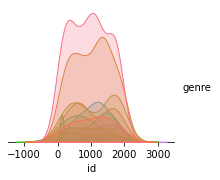

In [27]:
sns.pairplot(exploded_genres, hue = 'genre', corner = True)
plt.show()